In [32]:
import pandas as pd  
import numpy as np  
from sklearn.metrics import explained_variance_score, mean_absolute_error,median_absolute_error
from sklearn.model_selection import train_test_split  
from sklearn import preprocessing,svm
from sklearn.linear_model import LinearRegression
df = pd.read_csv('manycleandata.csv')
df

,測站氣壓(hPa),監測日期,監測時間,溫度(℃),相對溼度(%),風向,風速(m/s)
0,1009.4,5,23,24.0,84.0,5,3.7
1,1009.6,5,22,24.2,82.0,5,3.5
2,1009.4,5,21,24.3,81.0,5,5.1
3,1008.9,5,20,24.2,81.0,5,4.0
4,1008.1,5,19,24.5,78.0,5,4.5
5,1007.6,5,18,25.7,73.0,5,3.5
6,1007.1,5,17,26.4,70.0,4,3.2
7,1007.0,5,16,27.1,63.0,4,3.4
8,1007.5,5,15,27.0,61.0,4,2.4
9,1007.8,5,14,26.3,62.0,4,3.8


In [33]:
def derive_nth_day_feature(df, feature, N):
    col_name = "{}_{}".format(feature, N)
    df.loc[:,col_name] = df.loc[:,feature].shift(N)

In [34]:
numattr = ['測站氣壓(hPa)','溫度(℃)','相對溼度(%)','風向','風速(m/s)']
feature = '溫度(℃)'

In [35]:
for i in numattr:
    for N in range(5, 8):
        derive_nth_day_feature(df, i, N)
df

,測站氣壓(hPa),監測日期,監測時間,溫度(℃),相對溼度(%),風向,風速(m/s),測站氣壓(hPa)_5,測站氣壓(hPa)_6,測站氣壓(hPa)_7,...,溫度(℃)_7,相對溼度(%)_5,相對溼度(%)_6,相對溼度(%)_7,風向_5,風向_6,風向_7,風速(m/s)_5,風速(m/s)_6,風速(m/s)_7
0,1009.4,5,23,24.0,84.0,5,3.7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1009.6,5,22,24.2,82.0,5,3.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1009.4,5,21,24.3,81.0,5,5.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1008.9,5,20,24.2,81.0,5,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1008.1,5,19,24.5,78.0,5,4.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1007.6,5,18,25.7,73.0,5,3.5,1009.4,NaN,NaN,...,NaN,84.0,NaN,NaN,5.0,NaN,NaN,3.7,NaN,NaN
6,1007.1,5,17,26.4,70.0,4,3.2,1009.6,1009.4,NaN,...,NaN,82.0,84.0,NaN,5.0,5.0,NaN,3.5,3.7,NaN
7,1007.0,5,16,27.1,63.0,4,3.4,1009.4,1009.6,1009.4,...,24.0,81.0,82.0,84.0,5.0,5.0,5.0,5.1,3.5,3.7
8,1007.5,5,15,27.0,61.0,4,2.4,1008.9,1009.4,1009.6,...,24.2,81.0,81.0,82.0,5.0,5.0,5.0,4.0,5.1,3.5
9,1007.8,5,14,26.3,62.0,4,3.8,1008.1,1008.9,1009.4,...,24.3,78.0,81.0,81.0,5.0,5.0,5.0,4.5,4.0,5.1


In [36]:
numattr.remove(feature)
df.drop(numattr, axis=1,inplace = True)
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48137 entries, 7 to 48359
Data columns (total 18 columns):
監測日期           48137 non-null int64
監測時間           48137 non-null int64
溫度(℃)          48137 non-null float64
測站氣壓(hPa)_5    48137 non-null float64
測站氣壓(hPa)_6    48137 non-null float64
測站氣壓(hPa)_7    48137 non-null float64
溫度(℃)_5        48137 non-null float64
溫度(℃)_6        48137 non-null float64
溫度(℃)_7        48137 non-null float64
相對溼度(%)_5      48137 non-null float64
相對溼度(%)_6      48137 non-null float64
相對溼度(%)_7      48137 non-null float64
風向_5           48137 non-null float64
風向_6           48137 non-null float64
風向_7           48137 non-null float64
風速(m/s)_5      48137 non-null float64
風速(m/s)_6      48137 non-null float64
風速(m/s)_7      48137 non-null float64
dtypes: float64(16), int64(2)
memory usage: 7.0 MB


In [37]:
spread = df.describe().T
IQR = spread['75%'] - spread['25%']
spread['outliers'] = (spread['min']<(spread['25%']-(3*IQR)))|(spread['max'] > (spread['75%']+3*IQR))
spread.ix[spread.outliers,]

D:\Anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


,count,mean,std,min,25%,50%,75%,max,outliers
測站氣壓(hPa)_5,48137.0,1011.101562,7.015787,971.1,1005.9,1011.3,1016.4,1033.4,True
測站氣壓(hPa)_6,48137.0,1011.101411,7.015721,971.1,1005.9,1011.3,1016.4,1033.4,True
測站氣壓(hPa)_7,48137.0,1011.101213,7.015628,971.1,1005.9,1011.3,1016.4,1033.4,True
風速(m/s)_5,48137.0,2.367322,1.521274,0.0,1.1,2.1,3.5,14.9,True
風速(m/s)_6,48137.0,2.367316,1.521243,0.0,1.1,2.1,3.5,14.9,True
風速(m/s)_7,48137.0,2.367281,1.521272,0.0,1.1,2.1,3.5,14.9,True


In [38]:
df.corr()[[feature]].sort_values(feature)

,溫度(℃)
測站氣壓(hPa)_5,-0.804315
測站氣壓(hPa)_6,-0.796821
測站氣壓(hPa)_7,-0.788754
相對溼度(%)_5,-0.200454
風速(m/s)_7,-0.171214
相對溼度(%)_6,-0.164714
風速(m/s)_6,-0.155278
風速(m/s)_5,-0.140194
相對溼度(%)_7,-0.133387
監測時間,0.095944


In [39]:
import matplotlib
matplotlib.use('nbagg')

D:\Anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "D:\Anaconda\envs\tensorflow\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "D:\Anaconda\envs\tensorflow\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "D:\Anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "D:\Anaconda\envs\tensorflow\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "D:\Anaconda\envs\tensorflow\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File

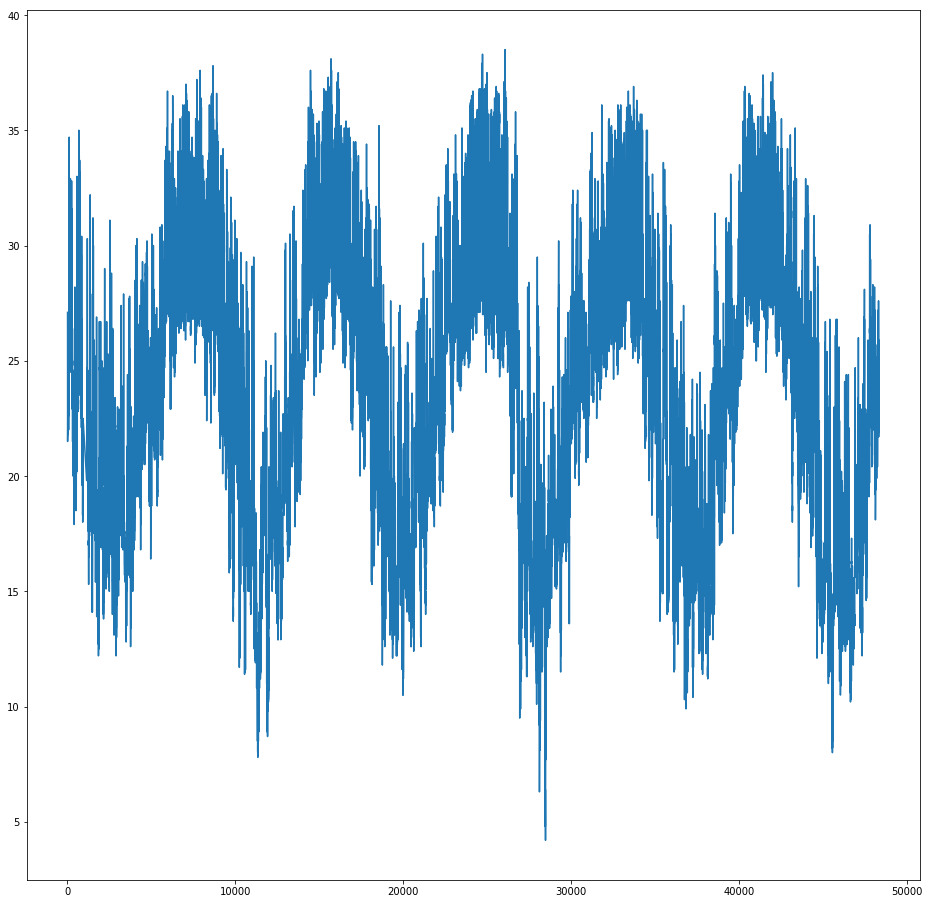

In [40]:
from pandas import Series
from matplotlib import pyplot
%matplotlib inline
pyplot.rcParams['figure.figsize'] = [16, 16]
series = df['溫度(℃)']
series.plot()

方法一分支

In [8]:
predictors = ['溫度(℃)_5','溫度(℃)_6', '溫度(℃)_7',  '測站氣壓(hPa)_5', '測站氣壓(hPa)_6','測站氣壓(hPa)_7']
df_choose = df[['溫度(℃)'] + predictors]  

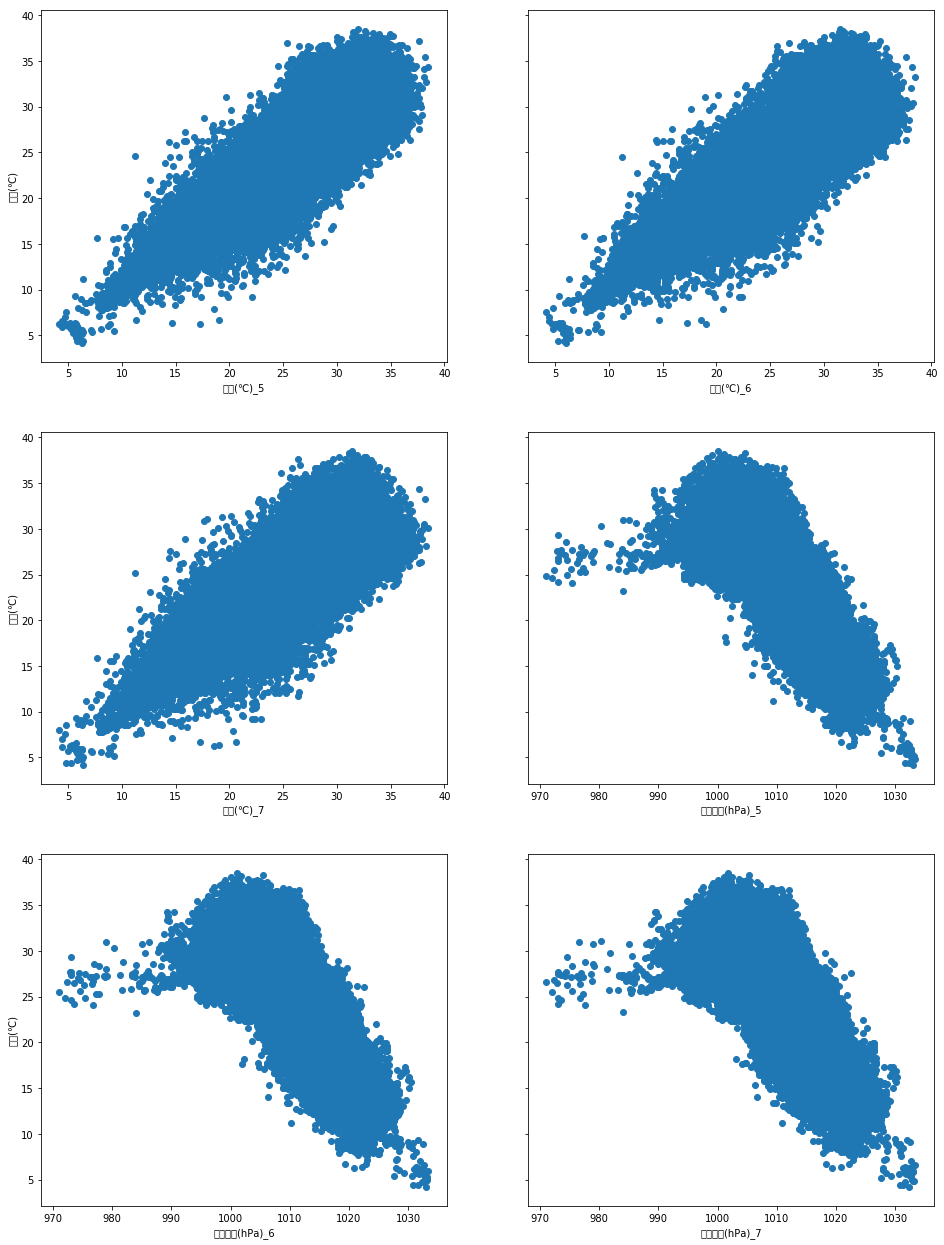

In [11]:
import matplotlib  
import matplotlib.pyplot as plt  
import numpy as np
plt.rcParams['figure.figsize'] = [16, 22]
fig, axes = plt.subplots(nrows=3, ncols=2, sharey=True)
arr = np.array(predictors).reshape(3, 2)
for row, col_arr in enumerate(arr):  
    for col, feature in enumerate(col_arr):
        axes[row, col].scatter(df_choose[feature], df_choose['溫度(℃)'])
        if col == 0:
            axes[row, col].set(xlabel=feature, ylabel='溫度(℃)')
        else:
            axes[row, col].set(xlabel=feature)
plt.show()

In [16]:
import statsmodels.api as sm
import sklearn
df_choose = sklearn.utils.shuffle(df_choose)
X = df_choose[predictors]  
y = df_choose['溫度(℃)']

X = sm.add_constant(X)  
X.head()

,const,溫度(℃)_5,溫度(℃)_6,溫度(℃)_7,測站氣壓(hPa)_5,測站氣壓(hPa)_6,測站氣壓(hPa)_7
47382,1.0,15.9,15.6,13.6,1022.0,1021.7,1025.2
45109,1.0,15.3,15.4,15.3,1015.3,1015.8,1016.5
45366,1.0,12.2,12.0,11.3,1023.5,1024.2,1027.8
8392,1.0,32.7,32.9,33.7,1000.2,999.8,999.2
19475,1.0,18.2,17.9,17.7,1012.2,1012.1,1012.1


In [17]:
alpha = 0.05

model = sm.OLS(y, X).fit()

model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  溫度(℃)   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                 4.021e+04
Date:                Sat, 01 Jun 2019   Prob (F-statistic):               0.00
Time:                        19:59:03   Log-Likelihood:            -1.1059e+05
No. Observations:               48137   AIC:                         2.212e+05
Df Residuals:                   48130   BIC:                         2.212e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         184.6484      2.797     66.023      0.000     179.167     190.130
溫度(℃)_5         1.0011      0.012     81.103      0.000       0.977       1.025
溫度(℃)_6        -0.2344      0.019    -12.523      0.000      -0.271      -0.198
溫度(℃)_7        -0.0407      0.012     -3.314      0.001      -0.065      -0.017
測站氣壓(hPa)_5    -0.5233      0.012    -42.395      0.000      -0.547      -0.499
測站氣壓(hPa)_6    -0.1492      0.016     -9.454      0.000      -0.180      -0.118
測站氣壓(hPa)_7     0.4962      0.012     40.336      0.000       0.472       0.520
==============================================================================
Omnibus:                     1609.162   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4536.141
Skew:                          -0.053   Prob(JB):                         0.00
Kurtosis:                       4.500   Cond. No.                     4.47e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.47e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
X = X.drop('const', axis=1)

In [19]:
#X = preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12) 
#regressor = svm.SVR(kernel='rbf')
regressor = LinearRegression(n_jobs = -1)
regressor.fit(X_train, y_train)
regressor.score(X_test,y_test)

0.8347056245242691

In [20]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(regressor, X, y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Accuracy: 0.83 (+/- 0.01)


In [21]:
import pickle
with open('second_outcome.pickle','wb') as f:
    pickle.dump(regressor, f)

方法二分支

In [8]:
predictors = ['溫度(℃)_5','溫度(℃)_6', '溫度(℃)_7',  '測站氣壓(hPa)_5', '測站氣壓(hPa)_6','測站氣壓(hPa)_7','監測日期','相對溼度(%)_5','監測時間']
df_choose = df[['溫度(℃)'] + predictors]  

In [14]:
import sklearn
df_choose = sklearn.utils.shuffle(df_choose)
X = df_choose[predictors]  
y = df_choose['溫度(℃)']

In [15]:
#X = preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12) 
#regressor = svm.SVR(kernel='rbf')
regressor = LinearRegression(n_jobs = -1)
regressor.fit(X_train, y_train)
regressor.score(X_test,y_test)

0.8597848924783985

In [16]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(regressor, X, y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Accuracy: 0.86 (+/- 0.01)


方法三分支

In [64]:
import sklearn
df = sklearn.utils.shuffle(df)
X = df.drop(['溫度(℃)'], axis=1)
y = df['溫度(℃)']

In [65]:
import statsmodels.api as sm
X = sm.add_constant(X)  
X.head()

,const,監測日期,監測時間,測站氣壓(hPa)_5,測站氣壓(hPa)_6,測站氣壓(hPa)_7,溫度(℃)_5,溫度(℃)_6,溫度(℃)_7,相對溼度(%)_5,相對溼度(%)_6,相對溼度(%)_7,風向_5,風向_6,風向_7,風速(m/s)_5,風速(m/s)_6,風速(m/s)_7
24901,1.0,7,10,1006.5,1007.2,1007.1,28.5,27.7,27.6,84.0,88.0,86.0,18.0,18.0,18.0,1.6,1.5,1.6
18943,1.0,3,16,1018.0,1018.7,1018.4,14.4,14.0,14.1,83.0,85.0,84.0,5.0,4.0,11.0,1.5,1.1,0.7
43111,1.0,5,16,1012.8,1012.9,1012.4,26.5,26.3,25.8,73.0,73.0,75.0,6.0,8.0,10.0,2.0,0.9,0.7
38169,1.0,12,14,1024.9,1025.3,1025.6,12.8,12.9,12.9,60.0,59.0,59.0,4.0,5.0,4.0,2.2,1.5,3.0
7560,1.0,7,23,1003.1,1002.9,1003.2,28.8,28.6,28.8,63.0,64.0,65.0,7.0,7.0,7.0,4.0,3.2,2.9


In [66]:
alpha = 0.05

model = sm.OLS(y, X).fit()

model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  溫度(℃)   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                 1.845e+04
Date:                Wed, 31 Jul 2019   Prob (F-statistic):               0.00
Time:                        14:18:39   Log-Likelihood:            -1.0521e+05
No. Observations:               48137   AIC:                         2.105e+05
Df Residuals:                   48119   BIC:                         2.106e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          92.3355      2.904     31.801      0.000      86.645      98.026
監測日期            0.0462      0.003     14.945      0.000       0.040       0.052
監測時間            0.1275      0.002     78.486      0.000       0.124       0.131
測站氣壓(hPa)_5    -0.6327      0.012    -54.487      0.000      -0.655      -0.610
測站氣壓(hPa)_6    -0.0486      0.015     -3.256      0.001      -0.078      -0.019
測站氣壓(hPa)_7     0.5887      0.012     50.882      0.000       0.566       0.611
溫度(℃)_5         0.5955      0.014     41.130      0.000       0.567       0.624
溫度(℃)_6        -0.0555      0.019     -2.865      0.004      -0.093      -0.018
溫度(℃)_7         0.3151      0.014     21.971      0.000       0.287       0.343
相對溼度(%)_5      -0.0634      0.003    -18.985      0.000      -0.070      -0.057
相對溼度(%)_6       0.0433      0.004     10.616      0.000       0.035       0.051
相對溼度(%)_7       0.0663      0.003     19.749      0.000       0.060       0.073
風向_5            0.0158      0.003      4.642      0.000       0.009       0.022
風向_6           -0.0214      0.004     -5.878      0.000      -0.029      -0.014
風向_7           -0.0306      0.003     -9.002      0.000      -0.037      -0.024
風速(m/s)_5       0.1882      0.012     15.985      0.000       0.165       0.211
風速(m/s)_6      -0.0629      0.013     -4.837      0.000      -0.088      -0.037
風速(m/s)_7      -0.1874      0.012    -15.723      0.000      -0.211      -0.164
==============================================================================
Omnibus:                     1648.380   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4436.630
Skew:                           0.112   Prob(JB):                         0.00
Kurtosis:                       4.470   Cond. No.                     5.20e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
X = X.drop('const', axis=1)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12) 
#regressor = svm.SVR(kernel='rbf')
regressor = LinearRegression(n_jobs = -1)
regressor.fit(X_train, y_train)
regressor.score(X_test,y_test)

0.8634083558116222

In [69]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(regressor, X, y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Accuracy: 0.87 (+/- 0.01)


In [70]:
yhat = regressor.predict(X_test)
test_y = y_test.values

In [71]:
from matplotlib import pyplot
%matplotlib qt5
pyplot.rcParams['figure.figsize'] = (50, 50)
pyplot.plot(test_y, label="Actual (%s)" % 'pollution1(t)')
pyplot.plot(yhat, label="Predicted (%s)" % 'pollution1(t)')
pyplot.legend()

In [72]:
from sklearn.metrics import explained_variance_score, mean_absolute_error,median_absolute_error
print("The Explained Variance: %.2f" % explained_variance_score(
                                            test_y, yhat))  
print("The Mean Absolute Error: %.2f degrees Celcius" % mean_absolute_error(
                                            test_y, yhat))  
print("The Median Absolute Error: %.2f degrees Celcius" % median_absolute_error(
                                            test_y, yhat))

The Explained Variance: 0.86
The Mean Absolute Error: 1.67 degrees Celcius
The Median Absolute Error: 1.31 degrees Celcius


DNN由此開始

In [10]:
import pandas as pd  
import numpy as np  
import tensorflow as tf  
from sklearn.metrics import explained_variance_score, mean_absolute_error,median_absolute_error
from sklearn.model_selection import train_test_split  

In [11]:
df = pd.read_csv('manycleandata.csv')
df

,測站氣壓(hPa),監測日期,監測時間,溫度(℃),相對溼度(%),風向,風速(m/s)
0,1009.4,5,23,24.0,84.0,5,3.7
1,1009.6,5,22,24.2,82.0,5,3.5
2,1009.4,5,21,24.3,81.0,5,5.1
3,1008.9,5,20,24.2,81.0,5,4.0
4,1008.1,5,19,24.5,78.0,5,4.5
5,1007.6,5,18,25.7,73.0,5,3.5
6,1007.1,5,17,26.4,70.0,4,3.2
7,1007.0,5,16,27.1,63.0,4,3.4
8,1007.5,5,15,27.0,61.0,4,2.4
9,1007.8,5,14,26.3,62.0,4,3.8


In [12]:
df.rename(columns = {  "測站氣壓(hPa)":"hPa", 
                        "溫度(℃)": "tem",
                         '相對溼度(%)':'humidity',
                         '風向':'wind',
                         '風速(m/s)':'windv',
                    '監測日期':'data',
                    '監測時間':'time'},inplace = True) 

In [13]:
def derive_nth_day_feature(df, feature, N):
    col_name = "{}_{}".format(feature, N)
    df.loc[:,col_name] = df.loc[:,feature].shift(N)

In [14]:
numattr = ['hPa','tem','humidity','wind','windv','data','time']
feature = 'tem'
for i in numattr:
    for N in range(5, 8):
        derive_nth_day_feature(df, i, N)
numattr.remove(feature)
df.drop(numattr, axis=1,inplace = True)
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48137 entries, 7 to 48359
Data columns (total 22 columns):
tem           48137 non-null float64
hPa_5         48137 non-null float64
hPa_6         48137 non-null float64
hPa_7         48137 non-null float64
tem_5         48137 non-null float64
tem_6         48137 non-null float64
tem_7         48137 non-null float64
humidity_5    48137 non-null float64
humidity_6    48137 non-null float64
humidity_7    48137 non-null float64
wind_5        48137 non-null float64
wind_6        48137 non-null float64
wind_7        48137 non-null float64
windv_5       48137 non-null float64
windv_6       48137 non-null float64
windv_7       48137 non-null float64
data_5        48137 non-null float64
data_6        48137 non-null float64
data_7        48137 non-null float64
time_5        48137 non-null float64
time_6        48137 non-null float64
time_7        48137 non-null float64
dtypes: float64(22)
memory usage: 8.4 MB


In [15]:
X = df.drop([feature], axis=1)
y = df[feature]
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.2, random_state=23)  
X_test, X_val, y_test, y_val = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=23)
feature_attr = [tf.feature_column.numeric_column(col) for col in X.columns] 

In [24]:
regressor = tf.estimator.DNNRegressor(feature_columns=feature_attr,
                                      hidden_units=[50, 50],
                                      model_dir='tf_wx_model')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_summary_steps': 100, '_num_ps_replicas': 0, '_tf_random_seed': None, '_master': '', '_train_distribute': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_service': None, '_protocol': None, '_eval_distribute': None, '_keep_checkpoint_every_n_hours': 10000, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001385EC09358>, '_task_type': 'worker', '_save_checkpoints_steps': None, '_evaluation_master': '', '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_experimental_distribute': None, '_keep_checkpoint_max': 5, '_device_fn': None, '_task_id': 0, '_model_dir': 'tf_wx_model', '_global_id_in_cluster': 0, '_num_worker_replicas': 1, '_is_chief': True}


In [25]:
def data_input_fn(X, y=None, num_epochs=None, shuffle=True, batch_size=400):
    return tf.estimator.inputs.pandas_input_fn(x=X,
                                               y=y,
                                               num_epochs=num_epochs,
                                               shuffle=shuffle,
                                               batch_size=batch_size)

In [26]:
evaluations = []
STEPS = 400
for i in range(200):
    regressor.train(input_fn=data_input_fn(X_train, y=y_train), steps=STEPS)
    evaluation = regressor.evaluate(input_fn=data_input_fn(X_val, y_val,
                                                         num_epochs=1,
                                                         shuffle=True),
                                    steps=1)
    evaluations.append(regressor.evaluate(input_fn=data_input_fn(X_val,
                                                               y_val,
                                                               num_epochs=1,
                                                               shuffle=True)))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-80000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 80000 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 12252.289, step = 80000
INFO:tensorflow:global_step/sec: 99.7723
INFO:tensorflow:loss = 2221.3228, step = 80100 (1.006 sec)
INFO:tensorflow:global_step/sec: 124.401
INFO:tensorflow:loss = 2003.4606, step = 80200 (0.804 sec)
INFO:tensorflow:global_step/sec: 133.506
INFO:tensorflow:loss = 1934.2802, step = 80300 (0.746 sec)
INFO:tensorflow:Saving checkpoints for 80400 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 2178.3618.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-06-04-07:18:04
INFO:tensorflow:G

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-81600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-06-04-07:18:27
INFO:tensorflow:Saving dict for global step 81600: average_loss = 4.639256, global_step = 81600, label/mean = 23.45247, loss = 1717.9523, prediction/mean = 23.476538
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 81600: tf_wx_model\model.ckpt-81600
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-81600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 81600 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 1956.3596, step = 81600
INFO:tensorflow:global_step/sec: 112.282
INFO:tensorfl

INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2019-06-04-07:18:53
INFO:tensorflow:Saving dict for global step 83200: average_loss = 4.876206, global_step = 83200, label/mean = 23.19075, loss = 1950.4823, prediction/mean = 23.06524
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 83200: tf_wx_model\model.ckpt-83200
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-06-04-07:18:54
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-83200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-06-04-07:18:54
INFO:tensorflow:Saving dict for global step 83200: average_loss = 4.555608, global_step = 83200, label/mean = 23.45247, loss = 1686.9766, prediction/mean = 23.28916
INFO:tensorflow:Saving 'checkpoint_path' summary fo

INFO:tensorflow:global_step/sec: 130.387
INFO:tensorflow:loss = 1717.755, step = 84700 (0.768 sec)
INFO:tensorflow:Saving checkpoints for 84800 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 1865.7095.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-06-04-07:19:19
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-84800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2019-06-04-07:19:19
INFO:tensorflow:Saving dict for global step 84800: average_loss = 4.012956, global_step = 84800, label/mean = 23.43075, loss = 1605.1824, prediction/mean = 23.202171
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 84800: tf_wx_model\model.ckpt-84800
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-86000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 86000 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 1826.7083, step = 86000
INFO:tensorflow:global_step/sec: 111.161
INFO:tensorflow:loss = 1834.1782, step = 86100 (0.907 sec)
INFO:tensorflow:global_step/sec: 120.95
INFO:tensorflow:loss = 1911.7178, step = 86200 (0.822 sec)
INFO:tensorflow:global_step/sec: 126.281
INFO:tensorflow:loss = 1426.2052, step = 86300 (0.790 sec)
INFO:tensorflow:Saving checkpoints for 86400 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 1806.3021.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-06-04-07:19:46
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-86400
INFO:tensorflow:Running loc

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-06-04-07:20:06
INFO:tensorflow:Saving dict for global step 87600: average_loss = 4.3354425, global_step = 87600, label/mean = 23.45247, loss = 1605.4478, prediction/mean = 23.40706
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 87600: tf_wx_model\model.ckpt-87600
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-87600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 87600 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 1597.4891, step = 87600
INFO:tensorflow:global_step/sec: 111.78
INFO:tensorflow:loss = 1974.8732, step = 87700 (0.897 sec)
INFO:tensorflow:global_step/sec: 136.79
INFO:tensorflow:loss = 

INFO:tensorflow:Saving dict for global step 89200: average_loss = 4.363852, global_step = 89200, label/mean = 23.08675, loss = 1745.5408, prediction/mean = 22.874657
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 89200: tf_wx_model\model.ckpt-89200
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-06-04-07:20:32
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-89200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-06-04-07:20:32
INFO:tensorflow:Saving dict for global step 89200: average_loss = 4.2714663, global_step = 89200, label/mean = 23.452473, loss = 1581.7567, prediction/mean = 23.429106
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 89200: tf_wx_model\model.ckpt-89200
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tens

INFO:tensorflow:Loss for final step: 1502.863.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-06-04-07:20:56
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-90800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2019-06-04-07:20:57
INFO:tensorflow:Saving dict for global step 90800: average_loss = 4.2352705, global_step = 90800, label/mean = 23.400501, loss = 1694.1083, prediction/mean = 23.508835
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 90800: tf_wx_model\model.ckpt-90800
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-06-04-07:20:57
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-90800
INFO:tensorflow:Running local

INFO:tensorflow:Saving checkpoints for 92000 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 1590.407, step = 92000
INFO:tensorflow:global_step/sec: 103.368
INFO:tensorflow:loss = 1521.432, step = 92100 (0.971 sec)
INFO:tensorflow:global_step/sec: 132.453
INFO:tensorflow:loss = 1631.3708, step = 92200 (0.754 sec)
INFO:tensorflow:global_step/sec: 131.93
INFO:tensorflow:loss = 1598.0793, step = 92300 (0.758 sec)
INFO:tensorflow:Saving checkpoints for 92400 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 1782.5377.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-06-04-07:21:22
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-92400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2019-06-04-07:21:23
INFO:tensorflow:Saving dict for global step 9

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 93600: tf_wx_model\model.ckpt-93600
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-93600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 93600 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 1650.0457, step = 93600
INFO:tensorflow:global_step/sec: 106.667
INFO:tensorflow:loss = 1662.9933, step = 93700 (0.940 sec)
INFO:tensorflow:global_step/sec: 135.68
INFO:tensorflow:loss = 1673.8921, step = 93800 (0.735 sec)
INFO:tensorflow:global_step/sec: 136.977
INFO:tensorflow:loss = 1661.7363, step = 93900 (0.730 sec)
INFO:tensorflow:Saving checkpoints for 94000 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 1412.2786.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-06-04-07:22:11
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-95200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-06-04-07:22:11
INFO:tensorflow:Saving dict for global step 95200: average_loss = 4.0825615, global_step = 95200, label/mean = 23.45247, loss = 1511.804, prediction/mean = 23.303652
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 95200: tf_wx_model\model.ckpt-95200
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-95200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 95200 into tf_wx_model\model.ckpt.
INF

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2019-06-04-07:22:36
INFO:tensorflow:Saving dict for global step 96800: average_loss = 4.1275907, global_step = 96800, label/mean = 23.262749, loss = 1651.0363, prediction/mean = 23.250252
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 96800: tf_wx_model\model.ckpt-96800
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-06-04-07:22:36
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-96800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-06-04-07:22:37
INFO:tensorflow:Saving dict for global step 96800: average_loss = 3.995198, global_step = 96800, label/mean = 23.452473, loss = 1479.4525, prediction/mean = 23.482561
INFO:te

INFO:tensorflow:loss = 1428.714, step = 98200 (0.758 sec)
INFO:tensorflow:global_step/sec: 129.044
INFO:tensorflow:loss = 1590.3442, step = 98300 (0.777 sec)
INFO:tensorflow:Saving checkpoints for 98400 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 1405.3473.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-06-04-07:23:01
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-98400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2019-06-04-07:23:02
INFO:tensorflow:Saving dict for global step 98400: average_loss = 3.8198144, global_step = 98400, label/mean = 23.8025, loss = 1527.9258, prediction/mean = 23.842854
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 98400: tf_wx_model\model.ckpt-98400
INFO:tensorflow:Calling model_fn.
INFO

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-99600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 99600 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 1469.8789, step = 99600
INFO:tensorflow:global_step/sec: 105.545
INFO:tensorflow:loss = 1591.5286, step = 99700 (0.950 sec)
INFO:tensorflow:global_step/sec: 129.544
INFO:tensorflow:loss = 1660.3732, step = 99800 (0.771 sec)
INFO:tensorflow:global_step/sec: 133.868
INFO:tensorflow:loss = 1594.9089, step = 99900 (0.746 sec)
INFO:tensorflow:Saving checkpoints for 100000 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 1629.123.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-06-04-07:23:27
INFO:tensorflow:Graph was finalized.
INFO:tensorflo

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-101200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-06-04-07:23:49
INFO:tensorflow:Saving dict for global step 101200: average_loss = 3.873367, global_step = 101200, label/mean = 23.452473, loss = 1434.3376, prediction/mean = 23.32944
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 101200: tf_wx_model\model.ckpt-101200
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-101200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 101200 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 1493.0583, step = 101200
INFO:tensorflow:global_step/sec: 108.159
INFO:

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2019-06-04-07:24:14
INFO:tensorflow:Saving dict for global step 102800: average_loss = 3.742052, global_step = 102800, label/mean = 23.608, loss = 1496.8208, prediction/mean = 23.57096
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 102800: tf_wx_model\model.ckpt-102800
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-06-04-07:24:14
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-102800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-06-04-07:24:15
INFO:tensorflow:Saving dict for global step 102800: average_loss = 3.7994902, global_step = 102800, label/mean = 23.452469, loss = 1406.9805, prediction/mean = 23.449345
INFO

INFO:tensorflow:global_step/sec: 137.541
INFO:tensorflow:loss = 1550.8943, step = 104200 (0.730 sec)
INFO:tensorflow:global_step/sec: 136.604
INFO:tensorflow:loss = 1681.919, step = 104300 (0.732 sec)
INFO:tensorflow:Saving checkpoints for 104400 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 1591.9539.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-06-04-07:24:39
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-104400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2019-06-04-07:24:39
INFO:tensorflow:Saving dict for global step 104400: average_loss = 3.6536455, global_step = 104400, label/mean = 23.323, loss = 1461.4583, prediction/mean = 23.220274
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 104400: tf_wx_model\model.ck

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-105600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 105600 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 1720.1158, step = 105600
INFO:tensorflow:global_step/sec: 101.489
INFO:tensorflow:loss = 1300.0104, step = 105700 (0.987 sec)
INFO:tensorflow:global_step/sec: 133.157
INFO:tensorflow:loss = 1378.142, step = 105800 (0.750 sec)
INFO:tensorflow:global_step/sec: 134.227
INFO:tensorflow:loss = 1423.627, step = 105900 (0.745 sec)
INFO:tensorflow:Saving checkpoints for 106000 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 1448.0262.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-06-04-07:25:05
INFO:tensorf

INFO:tensorflow:Starting evaluation at 2019-06-04-07:25:25
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-107200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-06-04-07:25:25
INFO:tensorflow:Saving dict for global step 107200: average_loss = 3.6566708, global_step = 107200, label/mean = 23.452473, loss = 1354.0933, prediction/mean = 23.376728
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 107200: tf_wx_model\model.ckpt-107200
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-107200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 107200 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 1353.0752,

INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-108800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2019-06-04-07:25:50
INFO:tensorflow:Saving dict for global step 108800: average_loss = 3.1707792, global_step = 108800, label/mean = 22.978, loss = 1268.3116, prediction/mean = 22.985785
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 108800: tf_wx_model\model.ckpt-108800
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-06-04-07:25:50
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-108800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-06-04-07:25:51
INFO:tensorflow:Saving dict for global step 108800: average_loss = 3.5997417, global_step = 108800, 

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 111600: tf_wx_model\model.ckpt-111600
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-111600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 111600 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 1465.0345, step = 111600
INFO:tensorflow:global_step/sec: 118.659
INFO:tensorflow:loss = 1452.3665, step = 111700 (0.846 sec)
INFO:tensorflow:global_step/sec: 133.689
INFO:tensorflow:loss = 1056.7794, step = 111800 (0.749 sec)
INFO:tensorflow:global_step/sec: 130.217
INFO:tensorflow:loss = 1377.4678, step = 111900 (0.767 sec)
INFO:tensorflow:Saving checkpoints for 112000 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 1357.8796.
INFO:tensorflow:Calling model_fn.
INFO:

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-06-04-07:27:01
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-113200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-06-04-07:27:01
INFO:tensorflow:Saving dict for global step 113200: average_loss = 3.4402626, global_step = 113200, label/mean = 23.45247, loss = 1273.9557, prediction/mean = 23.412199
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 113200: tf_wx_model\model.ckpt-113200
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-113200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints f

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-114800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2019-06-04-07:27:27
INFO:tensorflow:Saving dict for global step 114800: average_loss = 3.062901, global_step = 114800, label/mean = 23.521751, loss = 1225.1604, prediction/mean = 23.54468
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 114800: tf_wx_model\model.ckpt-114800
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-06-04-07:27:27
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-114800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-06-04-07:27:28
INFO:tensorflow:Saving dict for global step 114800: average_lo

INFO:tensorflow:loss = 1151.6477, step = 116000
INFO:tensorflow:global_step/sec: 107.353
INFO:tensorflow:loss = 1425.728, step = 116100 (0.935 sec)
INFO:tensorflow:global_step/sec: 137.164
INFO:tensorflow:loss = 1223.5631, step = 116200 (0.729 sec)
INFO:tensorflow:global_step/sec: 132.104
INFO:tensorflow:loss = 1245.0068, step = 116300 (0.755 sec)
INFO:tensorflow:Saving checkpoints for 116400 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 1059.6987.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-06-04-07:27:52
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-116400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2019-06-04-07:27:52
INFO:tensorflow:Saving dict for global step 116400: average_loss = 3.2310581, global_step = 116400, label/mean 

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 117600: tf_wx_model\model.ckpt-117600
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-117600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 117600 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 1325.9061, step = 117600
INFO:tensorflow:global_step/sec: 108.632
INFO:tensorflow:loss = 1469.0107, step = 117700 (0.923 sec)
INFO:tensorflow:global_step/sec: 130.048
INFO:tensorflow:loss = 1262.4768, step = 117800 (0.770 sec)
INFO:tensorflow:global_step/sec: 134.587
INFO:tensorflow:loss = 1153.338, step = 117900 (0.742 sec)
INFO:tensorflow:Saving checkpoints for 118000 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 1211.1368.
INFO:tensorflow:Calling model_fn.
INFO:t

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-06-04-07:28:38
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-119200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-06-04-07:28:38
INFO:tensorflow:Saving dict for global step 119200: average_loss = 3.2744207, global_step = 119200, label/mean = 23.45247, loss = 1212.5432, prediction/mean = 23.503838
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 119200: tf_wx_model\model.ckpt-119200
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-119200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints f

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-120800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2019-06-04-07:29:05
INFO:tensorflow:Saving dict for global step 120800: average_loss = 2.8272867, global_step = 120800, label/mean = 23.1545, loss = 1130.9147, prediction/mean = 23.152946
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 120800: tf_wx_model\model.ckpt-120800
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-06-04-07:29:06
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-120800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-06-04-07:29:06
INFO:tensorflow:Saving dict for global step 120800: average_lo

INFO:tensorflow:loss = 1432.9423, step = 122000
INFO:tensorflow:global_step/sec: 113.041
INFO:tensorflow:loss = 1177.6055, step = 122100 (0.891 sec)
INFO:tensorflow:global_step/sec: 120.804
INFO:tensorflow:loss = 1156.2833, step = 122200 (0.823 sec)
INFO:tensorflow:global_step/sec: 137.352
INFO:tensorflow:loss = 1331.415, step = 122300 (0.730 sec)
INFO:tensorflow:Saving checkpoints for 122400 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 1002.8942.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-06-04-07:29:31
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-122400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2019-06-04-07:29:31
INFO:tensorflow:Saving dict for global step 122400: average_loss = 2.8456106, global_step = 122400, label/mean 

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 123600: tf_wx_model\model.ckpt-123600
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-123600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 123600 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 1009.87726, step = 123600
INFO:tensorflow:global_step/sec: 106.331
INFO:tensorflow:loss = 1334.1853, step = 123700 (0.941 sec)
INFO:tensorflow:global_step/sec: 136.604
INFO:tensorflow:loss = 1297.8596, step = 123800 (0.731 sec)
INFO:tensorflow:global_step/sec: 135.679
INFO:tensorflow:loss = 1417.3296, step = 123900 (0.738 sec)
INFO:tensorflow:Saving checkpoints for 124000 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 1124.8159.
INFO:tensorflow:Calling model_fn.
INFO

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-06-04-07:30:16
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-125200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-06-04-07:30:17
INFO:tensorflow:Saving dict for global step 125200: average_loss = 3.1164665, global_step = 125200, label/mean = 23.452473, loss = 1154.0515, prediction/mean = 23.383017
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 125200: tf_wx_model\model.ckpt-125200
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-125200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints 

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-126800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2019-06-04-07:30:42
INFO:tensorflow:Saving dict for global step 126800: average_loss = 3.1008422, global_step = 126800, label/mean = 23.423, loss = 1240.3369, prediction/mean = 23.225466
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 126800: tf_wx_model\model.ckpt-126800
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-06-04-07:30:42
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-126800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-06-04-07:30:43
INFO:tensorflow:Saving dict for global step 126800: average_los

INFO:tensorflow:global_step/sec: 114.141
INFO:tensorflow:loss = 1044.4535, step = 128100 (0.879 sec)
INFO:tensorflow:global_step/sec: 122.726
INFO:tensorflow:loss = 1206.7128, step = 128200 (0.813 sec)
INFO:tensorflow:global_step/sec: 134.587
INFO:tensorflow:loss = 926.94543, step = 128300 (0.745 sec)
INFO:tensorflow:Saving checkpoints for 128400 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 1197.0676.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-06-04-07:31:08
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-128400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2019-06-04-07:31:09
INFO:tensorflow:Saving dict for global step 128400: average_loss = 3.1636395, global_step = 128400, label/mean = 24.032001, loss = 1265.4558, prediction/mean 

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 129600: tf_wx_model\model.ckpt-129600
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-129600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 129600 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 1029.2701, step = 129600
INFO:tensorflow:global_step/sec: 106.554
INFO:tensorflow:loss = 1205.7795, step = 129700 (0.945 sec)
INFO:tensorflow:global_step/sec: 130.896
INFO:tensorflow:loss = 1024.0911, step = 129800 (0.761 sec)
INFO:tensorflow:global_step/sec: 135.865
INFO:tensorflow:loss = 1152.9263, step = 129900 (0.737 sec)
INFO:tensorflow:Saving checkpoints for 130000 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 1226.7563.
INFO:tensorflow:Calling model_fn.
INFO:

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-06-04-07:31:55
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-131200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-06-04-07:31:55
INFO:tensorflow:Saving dict for global step 131200: average_loss = 2.9449122, global_step = 131200, label/mean = 23.45247, loss = 1090.5237, prediction/mean = 23.352123
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 131200: tf_wx_model\model.ckpt-131200
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-131200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints f

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-132800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2019-06-04-07:32:20
INFO:tensorflow:Saving dict for global step 132800: average_loss = 2.7710693, global_step = 132800, label/mean = 23.052, loss = 1108.4277, prediction/mean = 22.993687
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 132800: tf_wx_model\model.ckpt-132800
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-06-04-07:32:21
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-132800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-06-04-07:32:21
INFO:tensorflow:Saving dict for global step 132800: average_los

INFO:tensorflow:global_step/sec: 110.548
INFO:tensorflow:loss = 1107.44, step = 134100 (0.907 sec)
INFO:tensorflow:global_step/sec: 132.453
INFO:tensorflow:loss = 1113.8783, step = 134200 (0.757 sec)
INFO:tensorflow:global_step/sec: 127.243
INFO:tensorflow:loss = 871.33844, step = 134300 (0.784 sec)
INFO:tensorflow:Saving checkpoints for 134400 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 952.8701.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-06-04-07:32:45
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-134400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2019-06-04-07:32:46
INFO:tensorflow:Saving dict for global step 134400: average_loss = 3.0097272, global_step = 134400, label/mean = 23.241999, loss = 1203.8909, prediction/mean = 2

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 135600: tf_wx_model\model.ckpt-135600
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-135600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 135600 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 1239.648, step = 135600
INFO:tensorflow:global_step/sec: 104.663
INFO:tensorflow:loss = 950.2298, step = 135700 (0.958 sec)
INFO:tensorflow:global_step/sec: 136.79
INFO:tensorflow:loss = 1055.072, step = 135800 (0.730 sec)
INFO:tensorflow:global_step/sec: 136.418
INFO:tensorflow:loss = 1113.7937, step = 135900 (0.733 sec)
INFO:tensorflow:Saving checkpoints for 136000 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 1157.292.
INFO:tensorflow:Calling model_fn.
INFO:tenso

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-06-04-07:33:31
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-137200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-06-04-07:33:31
INFO:tensorflow:Saving dict for global step 137200: average_loss = 2.8055506, global_step = 137200, label/mean = 23.45247, loss = 1038.917, prediction/mean = 23.41984
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 137200: tf_wx_model\model.ckpt-137200
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-137200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-138800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2019-06-04-07:33:57
INFO:tensorflow:Saving dict for global step 138800: average_loss = 2.634333, global_step = 138800, label/mean = 23.2795, loss = 1053.7332, prediction/mean = 23.26533
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 138800: tf_wx_model\model.ckpt-138800
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-06-04-07:33:58
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-138800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-06-04-07:33:59
INFO:tensorflow:Saving dict for global step 138800: average_loss

INFO:tensorflow:global_step/sec: 112.409
INFO:tensorflow:loss = 1070.2137, step = 140100 (0.894 sec)
INFO:tensorflow:global_step/sec: 121.684
INFO:tensorflow:loss = 1099.157, step = 140200 (0.822 sec)
INFO:tensorflow:global_step/sec: 119.508
INFO:tensorflow:loss = 1044.0405, step = 140300 (0.837 sec)
INFO:tensorflow:Saving checkpoints for 140400 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 985.0118.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-06-04-07:34:24
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-140400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2019-06-04-07:34:25
INFO:tensorflow:Saving dict for global step 140400: average_loss = 2.8380463, global_step = 140400, label/mean = 24.19425, loss = 1135.2185, prediction/mean = 2

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 141600: tf_wx_model\model.ckpt-141600
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-141600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 141600 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 951.92865, step = 141600
INFO:tensorflow:global_step/sec: 85.6986
INFO:tensorflow:loss = 879.0787, step = 141700 (1.173 sec)
INFO:tensorflow:global_step/sec: 101.588
INFO:tensorflow:loss = 862.8833, step = 141800 (0.982 sec)
INFO:tensorflow:global_step/sec: 132.104
INFO:tensorflow:loss = 1014.9386, step = 141900 (0.757 sec)
INFO:tensorflow:Saving checkpoints for 142000 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 967.73035.
INFO:tensorflow:Calling model_fn.
INFO:te

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-06-04-07:35:18
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-143200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-06-04-07:35:19
INFO:tensorflow:Saving dict for global step 143200: average_loss = 2.7054267, global_step = 143200, label/mean = 23.45247, loss = 1001.8403, prediction/mean = 23.456938
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 143200: tf_wx_model\model.ckpt-143200
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-143200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints f

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-144800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2019-06-04-07:35:48
INFO:tensorflow:Saving dict for global step 144800: average_loss = 2.417357, global_step = 144800, label/mean = 23.249, loss = 966.9428, prediction/mean = 23.349617
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 144800: tf_wx_model\model.ckpt-144800
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-06-04-07:35:49
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-144800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-06-04-07:35:49
INFO:tensorflow:Saving dict for global step 144800: average_loss 

INFO:tensorflow:global_step/sec: 95.3293
INFO:tensorflow:loss = 1042.3241, step = 146100 (1.054 sec)
INFO:tensorflow:global_step/sec: 111.023
INFO:tensorflow:loss = 1025.9497, step = 146200 (0.900 sec)
INFO:tensorflow:global_step/sec: 121.634
INFO:tensorflow:loss = 1036.1515, step = 146300 (0.822 sec)
INFO:tensorflow:Saving checkpoints for 146400 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 1092.4489.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-06-04-07:36:17
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-146400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2019-06-04-07:36:18
INFO:tensorflow:Saving dict for global step 146400: average_loss = 2.8063018, global_step = 146400, label/mean = 23.80475, loss = 1122.5208, prediction/mean =

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 147600: tf_wx_model\model.ckpt-147600
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-147600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 147600 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 991.9186, step = 147600
INFO:tensorflow:global_step/sec: 111.998
INFO:tensorflow:loss = 818.7729, step = 147700 (0.894 sec)
INFO:tensorflow:global_step/sec: 115.645
INFO:tensorflow:loss = 1124.2692, step = 147800 (0.869 sec)
INFO:tensorflow:global_step/sec: 98.983
INFO:tensorflow:loss = 1022.2488, step = 147900 (1.009 sec)
INFO:tensorflow:Saving checkpoints for 148000 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 1007.50446.
INFO:tensorflow:Calling model_fn.
INFO:te

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-06-04-07:37:16
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-149200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-06-04-07:37:17
INFO:tensorflow:Saving dict for global step 149200: average_loss = 2.6625626, global_step = 149200, label/mean = 23.452475, loss = 985.9674, prediction/mean = 23.283686
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 149200: tf_wx_model\model.ckpt-149200
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-149200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints f

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-150800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2019-06-04-07:37:48
INFO:tensorflow:Saving dict for global step 150800: average_loss = 2.534237, global_step = 150800, label/mean = 22.893251, loss = 1013.69476, prediction/mean = 22.973717
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 150800: tf_wx_model\model.ckpt-150800
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-06-04-07:37:48
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-150800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-06-04-07:37:49
INFO:tensorflow:Saving dict for global step 150800: average_

INFO:tensorflow:global_step/sec: 76.1334
INFO:tensorflow:loss = 884.6317, step = 152100 (1.317 sec)
INFO:tensorflow:global_step/sec: 125.022
INFO:tensorflow:loss = 928.271, step = 152200 (0.799 sec)
INFO:tensorflow:global_step/sec: 129.711
INFO:tensorflow:loss = 923.4222, step = 152300 (0.771 sec)
INFO:tensorflow:Saving checkpoints for 152400 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 816.3879.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-06-04-07:38:18
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-152400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2019-06-04-07:38:18
INFO:tensorflow:Saving dict for global step 152400: average_loss = 2.2231095, global_step = 152400, label/mean = 23.052252, loss = 889.24384, prediction/mean = 22.

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 153600: tf_wx_model\model.ckpt-153600
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-153600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 153600 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 993.692, step = 153600
INFO:tensorflow:global_step/sec: 95.8738
INFO:tensorflow:loss = 794.8023, step = 153700 (1.048 sec)
INFO:tensorflow:global_step/sec: 106.424
INFO:tensorflow:loss = 1142.264, step = 153800 (0.938 sec)
INFO:tensorflow:global_step/sec: 92.4261
INFO:tensorflow:loss = 1050.3606, step = 153900 (1.085 sec)
INFO:tensorflow:Saving checkpoints for 154000 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 1072.0822.
INFO:tensorflow:Calling model_fn.
INFO:tens

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-06-04-07:39:19
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-155200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-06-04-07:39:19
INFO:tensorflow:Saving dict for global step 155200: average_loss = 2.578327, global_step = 155200, label/mean = 23.452473, loss = 954.77435, prediction/mean = 23.403448
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 155200: tf_wx_model\model.ckpt-155200
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-155200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints f

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-156800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2019-06-04-07:39:49
INFO:tensorflow:Saving dict for global step 156800: average_loss = 2.4946325, global_step = 156800, label/mean = 23.329748, loss = 997.853, prediction/mean = 23.393373
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 156800: tf_wx_model\model.ckpt-156800
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-06-04-07:39:49
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-156800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-06-04-07:39:50
INFO:tensorflow:Saving dict for global step 156800: average_lo

INFO:tensorflow:global_step/sec: 106.349
INFO:tensorflow:loss = 891.0684, step = 158100 (0.946 sec)
INFO:tensorflow:global_step/sec: 119.007
INFO:tensorflow:loss = 930.9704, step = 158200 (0.839 sec)
INFO:tensorflow:global_step/sec: 118.501
INFO:tensorflow:loss = 962.9393, step = 158300 (0.846 sec)
INFO:tensorflow:Saving checkpoints for 158400 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 782.65155.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-06-04-07:40:20
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-158400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2019-06-04-07:40:21
INFO:tensorflow:Saving dict for global step 158400: average_loss = 2.260887, global_step = 158400, label/mean = 23.64875, loss = 904.3548, prediction/mean = 23.6

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 159600: tf_wx_model\model.ckpt-159600
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-159600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 159600 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 1007.672, step = 159600
INFO:tensorflow:global_step/sec: 105.544
INFO:tensorflow:loss = 1134.8015, step = 159700 (0.951 sec)
INFO:tensorflow:global_step/sec: 120.31
INFO:tensorflow:loss = 966.44006, step = 159800 (0.831 sec)
INFO:tensorflow:global_step/sec: 120.122
INFO:tensorflow:loss = 1016.05896, step = 159900 (0.831 sec)
INFO:tensorflow:Saving checkpoints for 160000 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 1014.99426.
INFO:tensorflow:Calling model_fn.
INFO:

In [27]:
evaluations[0]

{'average_loss': 5.056225,
 'global_step': 80400,
 'label/mean': 23.45247,
 'loss': 1872.3589,
 'prediction/mean': 23.385633}

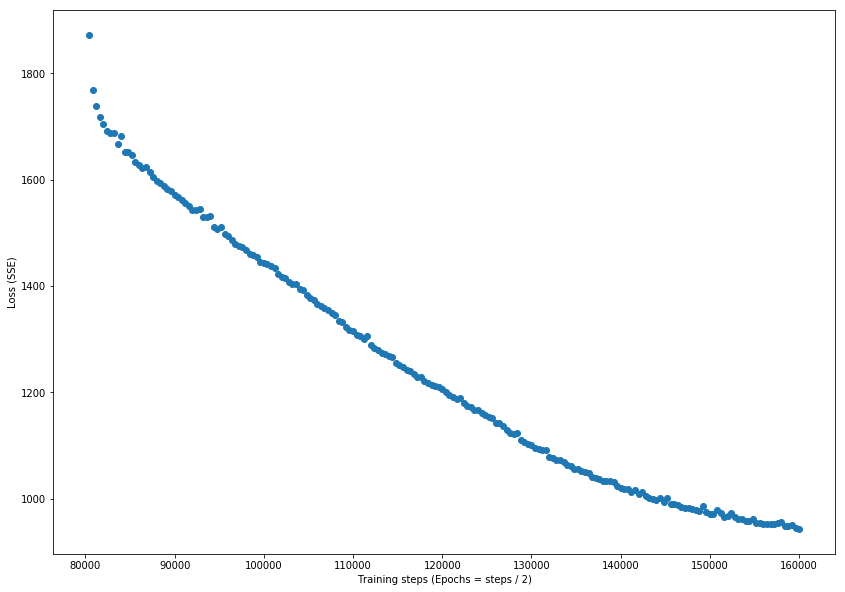

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

# manually set the parameters of the figure to and appropriate size
plt.rcParams['figure.figsize'] = [14, 10]

loss_values = [ev['loss'] for ev in evaluations]
training_steps = [ev['global_step'] for ev in evaluations]

plt.scatter(x=training_steps, y=loss_values)
plt.xlabel('Training steps (Epochs = steps / 2)')
plt.ylabel('Loss (SSE)')
plt.show()

In [29]:
pred = regressor.predict(input_fn=data_input_fn(X_test,
                                              num_epochs=1,
                                              shuffle=False))
predictions = np.array([p['predictions'][0] for p in pred])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-160000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [30]:
predictions

array([25.089954, 19.678288, 17.79564 , ..., 33.06074 , 15.920199,
       30.535501], dtype=float32)

In [31]:
print("The Explained Variance: %.2f" % explained_variance_score(
                                            y_test, predictions))  
print("The Mean Absolute Error: %.2f degrees Celcius" % mean_absolute_error(
                                            y_test, predictions))  
print("The Median Absolute Error: %.2f degrees Celcius" % median_absolute_error(
                                            y_test, predictions))

The Explained Variance: 0.93
The Mean Absolute Error: 1.18 degrees Celcius
The Median Absolute Error: 0.94 degrees Celcius
